<a href="https://colab.research.google.com/github/Harsaroop/COMP-3710-Project-2/blob/main/Bias_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias Correction

In [9]:
import math 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
df.round(decimals = 3)
df.drop
df = df.dropna()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21,2016-07-13,29.4,23.8,41.974205,87.207954,31.687531,23.559198,8.729008,30.103376,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,5731.151367,31.4,23.7
4996,22,2016-07-13,30.5,23.9,47.098755,85.527657,30.619821,23.963060,7.511284,89.966421,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,5723.705566,32.3,24.5
4997,23,2016-07-13,29.9,24.2,44.952415,88.356277,30.959148,23.534363,7.854094,90.602445,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,5722.567871,33.6,24.6
4998,24,2016-07-13,29.8,23.9,42.318356,86.101814,31.491212,23.700775,8.079459,47.956783,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,5721.034180,32.6,24.4


In [11]:
x = df[:].drop(['Present_Tmax', 'Date', 'Solar radiation'], axis = 1).values
y = df['Present_Tmax'].values

In [12]:
print(x.shape,y.shape)

(5000, 22) (5000,)


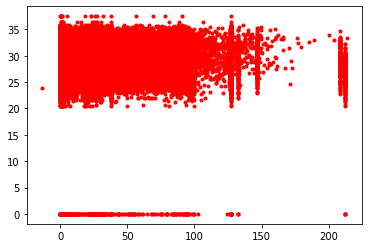

In [13]:
plt.plot(x, y, 'r.')
plt.show()

In [14]:
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.2)

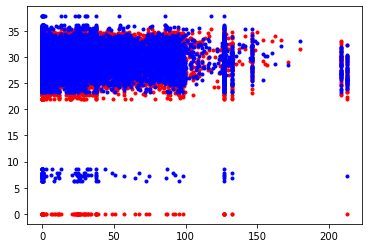

RMSE = 2.0143820777902732


In [15]:
#Linear Regression 
regr_LR = LR()
regr_LR.fit(x_train, y_train)

#Mu
#Predicting Temp Max
predict_Tmax = regr_LR.predict(x_test)

#Plotting graph 
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, predict_Tmax, 'b.')
plt.show()
rmse_lnr = math.sqrt(((y_test - predict_Tmax)**2).mean())
print("RMSE = " + str(rmse_lnr))

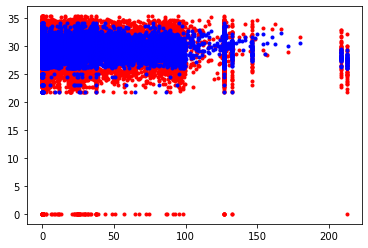

RMSE =  2.797707219541017


In [16]:
#SVR - Support Vector Regression 
regr_SVR = SVR()
regr_SVR.fit(x_train, y_train)

#Predicting Temp Max 
predict_Tmax = regr_SVR.predict(x_test)

#Plotting Graph
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, predict_Tmax, 'b.')
plt.show()
rmse_lnr= math.sqrt(((y_test - predict_Tmax)**2).mean())
print("RMSE = ",rmse_lnr)
